# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [69]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [47]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [49]:
# Sample data 를 이용해 Classification 을 진행해보자. 
samples = 1000
x, y = make_classification(n_samples=samples, n_features=2, # 분류될 클래스의 개수
                           n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                           n_redundant=0, # 노이즈 개수
                           n_clusters_per_class=1) # 클래스당 클러스터의 개수 예) class 0 는 2개의 cluster로 분리된다

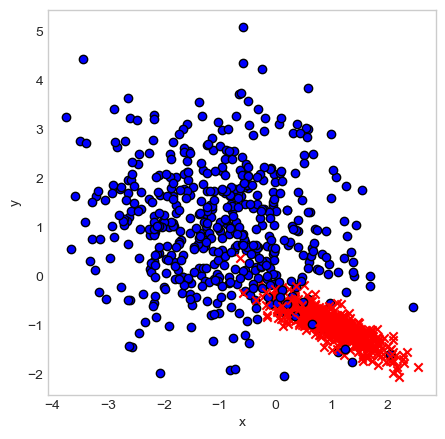

In [70]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
  else:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [98]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.94125
Test Data Score : 0.955


In [100]:
scores = cross_val_score(model, x, y, cv = 10, scoring = 'accuracy') # accuray: 0과1로 분류가 제대로 됐나 측정

print(f'CV mean score: {scores.mean()}')

CV mean score: 0.944


In [101]:
model.intercept_, model.coef_

(array([1.34549623]), array([[-1.73416647,  2.76014032]]))

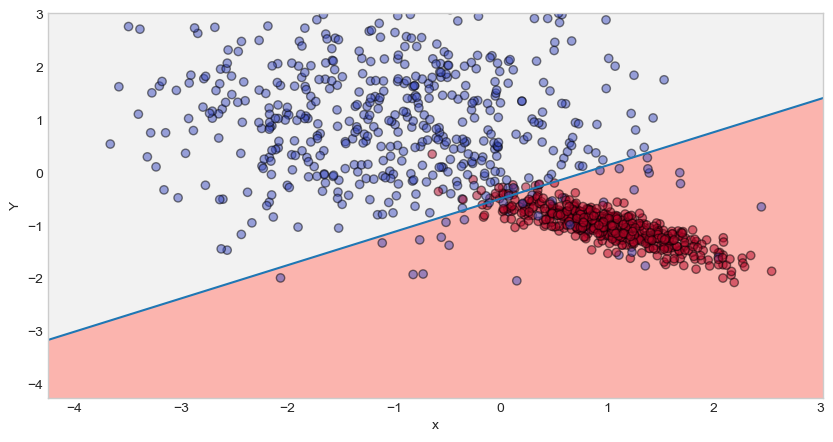

In [102]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 
y_min, y_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 격자 데이터 생성
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel(): 다차원을 1차원으로 해체

# Test data를 용한 분류 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# train data 를 plot에 출력
plt.scatter(x[:, 0], x[:, 1], c=np.abs(y -1), edgecolors='k', alpha = .5, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

# 분류 직선 
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
x_lin = np.linspace(x_min, x_max)
y_lin = -(w_1/w_2)*x_lin  - (w_0/w_2)

plt.plot(x_lin, y_lin)

plt.show()

## 붓꽃 데이터

In [103]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![iris.png](https://lh3.googleusercontent.com/u/1/drive-viewer/AFDK6gOWy-9_2iDaquH9XyhlErETdBXTnirMlrg8W4EjMJTFw_89d6c5kAu_jY_jaVidWC5Ux5zWt0xRJ59NhnVRtOnR46BzEQ=w3840-h1981)

In [13]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [104]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
# [0,1,2] -> ['setosa', 'versicolor', 'virginica'] 로 변경
# pairplot와 같은 차트를 통해 feature의 관계를 확인하기 위해서
species = pd.Series(iris.target, dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [110]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [111]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [112]:
iris_df.describe()
#  통계량 확인 및 이상치 확인 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot 
- Median: 데이터의 중앙값
- 1사 분위(Q1): Median 을 기준으로 하위 25% 지점
- 3사 분위(Q3): Median 을 기준으로 상위 25% 지점
- Interquartile range (IQR)(상자길이) : Q3 - Q1
- Lower and upper 1.5*IQR whiskers(수염)
- Outliers(이상점):  Q1 − 1.5 IQR 또는 Q3 + 1.5 IQR 밖에 위치하는 데이터


![image.png](https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png)

<AxesSubplot:>

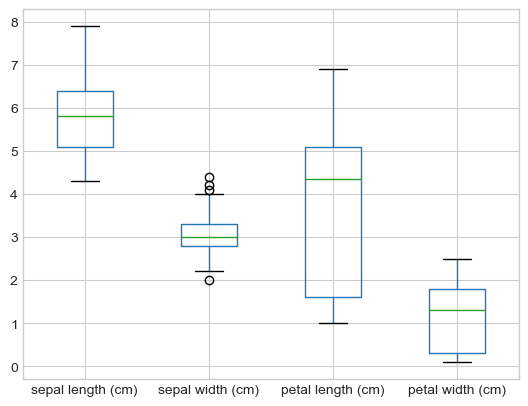

In [113]:
iris_df.boxplot()

<AxesSubplot:>

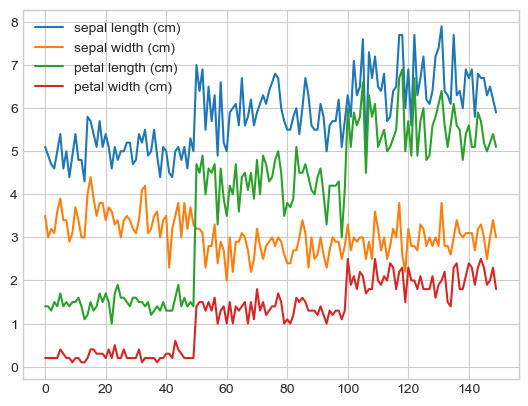

In [114]:
iris_df.plot()

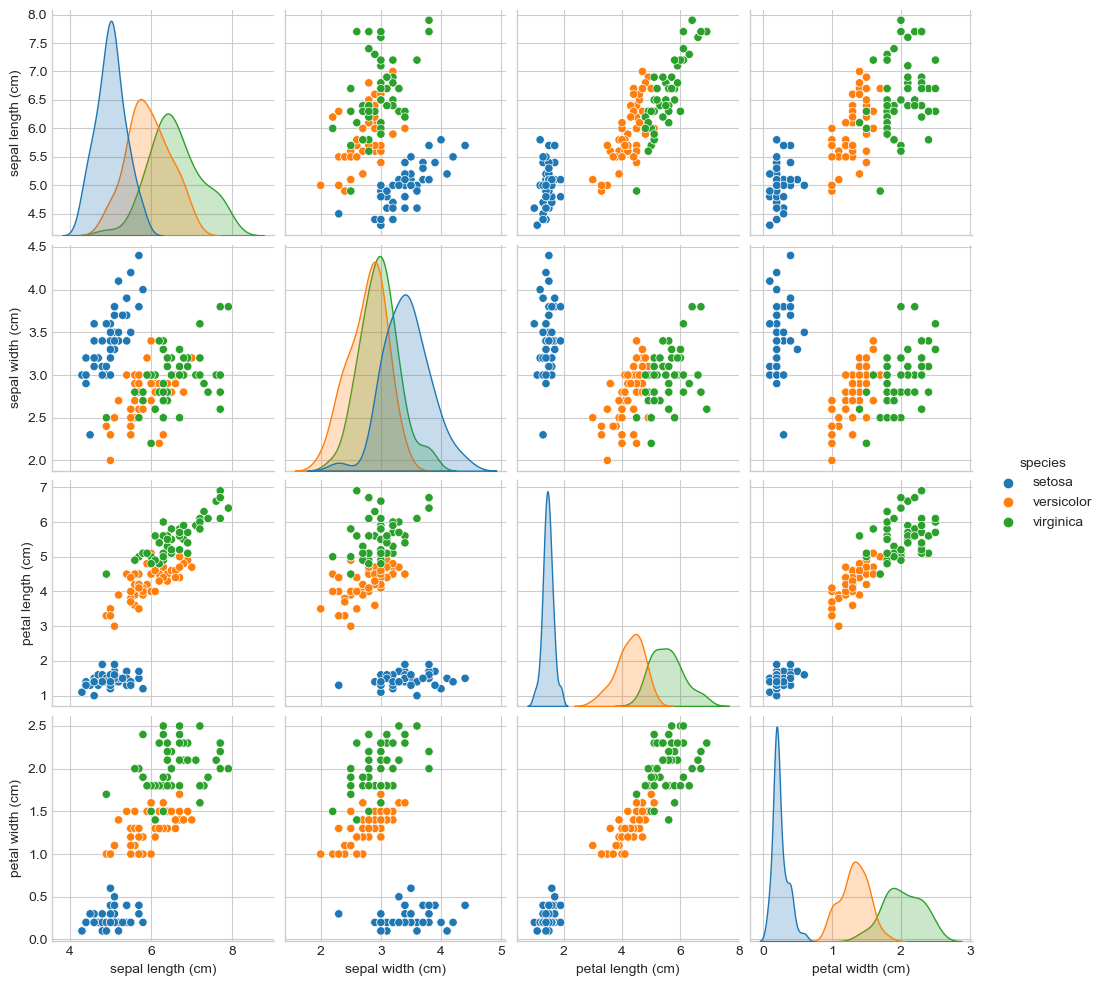

In [115]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target,   # iris.data[:, [2, 3]] -> petal length, petal width
                                                    test_size=0.2, random_state=1,stratify = iris.target) # random_state=1 -> 여러번 수행해도 동일한 학습/테스트용 데이터 세트로 맞춰줌.
# stratify :  stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation 유지 
# 한 쪽에 쏠려서 분배되는 것을 방지 

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', # 최적화에 사용할 알고리즘 설정
                           multi_class='auto', 
                           C=100, # 규칙의 강도의 역수 값(높은 C를 설정할수록, 낮은 강도의 제약조건, 강한 규제)
                           random_state=1) 
model.fit(x_train, y_train)

LogisticRegression(C=100, random_state=1)

### solver
- optimization에 사용되는 algorithm의 종류. 
    - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} (default: 'lbfgs')
- 작은 dataset의 경우 'liblinear'이 좋은 선택일 수 있으며, 'sag'과 'saga'는 큰 dataset에서 더욱 빠르게 동작한다.
- Multiclass problem의 경우, 'newton-cg', 'sag', 'saga', 'lbfgs'만이 multinomial loss를 다룰 수 있다.
- 'liblinear'은 one-versus-rest scheme에서만 동작한다.
- 각 solver가 지원하는 penalty의 종류
    - 'newton-cg': 'l2', 'none'
    - 'lbfgs': 'l2', 'none'
    - 'liblinear': 'l1', 'l2'
    - 'sag': 'l2', 'none'
    - 'saga': 'elasticnet', 'l1', 'l2', 'none'

In [118]:
print('학습 데이터 점수: {}'.format(model.score(x_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(x_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [119]:
import numpy as np
x = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

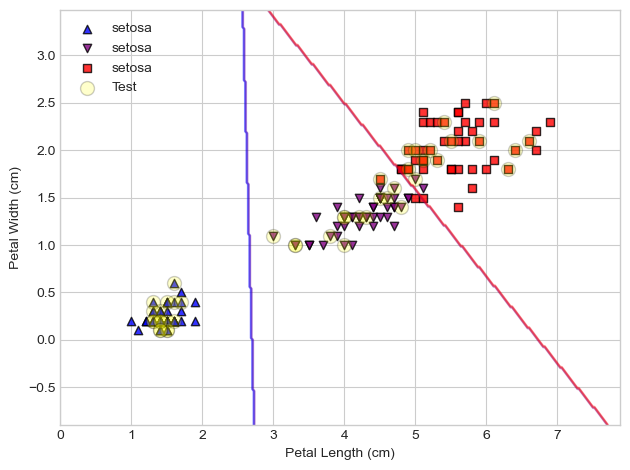

In [120]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                       np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

specise = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# 실제 train dataset
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
              alpha = 0.8, c=colors[idx],
              marker=markers[idx], label=species[cl],
              edgecolor='k')
  

# test set
x_comb_test, y_comb_test = x[range(105, 150), :], y[range(105, 150)]
plt.scatter(x_comb_test[:, 0], x_comb_test[:, 1],
            c='yellow', edgecolor = 'k', alpha=0.2,
            linewidth=1, marker='o', 
            s=100, label='Test')
  
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout()

In [121]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2, 2.2, 2.4, 2.6, 2.8]}]  # C : class weight

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count()) # cpu_count로 resouce 개수를 더 많이 줘서 속도 개선
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': [2, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [123]:
result = gs.fit(iris.data, iris.target)

/Users/leesangyup/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leesangyup/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [33]:
print(gs.best_estimator_)
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000091,0.000029,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.022856,0.007924,0.000306,0.000267,2,l2,"{'C': 2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000192,0.000212,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.027087,0.006144,0.000216,0.000027,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000186,0.000238,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.021041,0.004789,0.000201,0.000018,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000068,0.000011,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.022556,0.004255,0.000215,0.000032,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000076,0.000025,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.021432,0.006678,0.000210,0.000029,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [125]:
from sklearn.datasets import load_breast_cancer

In [126]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [127]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [128]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


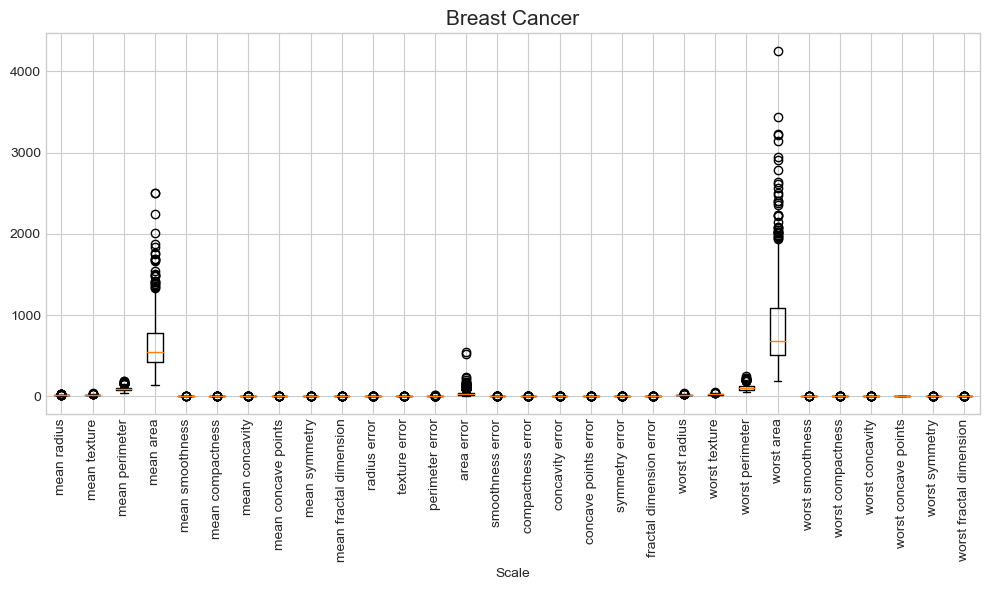

In [131]:
fig, plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90) # 수치형 변수 개수 넣음
plt.xlabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀

In [45]:
x,y = load_breast_cancer(return_X_y= True)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

In [40]:
cancer.data.shape

(569, 30)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data[:,:-1], cancer.target, test_size= 0.2, random_state=1, stratify= cancer.target)

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', # 최적화에 사용할 알고리즘 설정
                           multi_class='auto', 
                           C=100, # 규칙의 강도의 역수 값(높은 C를 설정할수록, 낮은 강도의 제약조건, 강한 규제)
                           random_state=1)
model.fit(x_train, y_train)

LogisticRegression(C=100, random_state=1)

In [41]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9494505494505494
Test Data Score: 0.9649122807017544


In [42]:
import numpy as np
x = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

In [81]:
x.shape

(569, 29)

In [82]:
y.shape

(569,)

In [ ]:
from matplotlib.colors import ListedColormap

# 격자를 이용한 분류 직선 표시
x1_min, x1_max = x[:, :].min()-1, x[:, :].max()+1
x2_min, x2_max = x[:, :].min()-1, x[:, :].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                       np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
